In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error 

In [2]:
# Generate some synthetic data with outliers
np.random.seed(0)
n = 100
X = np.random.rand(n, 1) * 10
epsilon = np.random.randn(n, 1) * 2
y = 3 * X.squeeze() + 2 + epsilon.squeeze()

In [3]:
# Create initial DataFrame without outliers
df = pd.DataFrame({'X': X.squeeze(), 'y': y})

In [4]:
# Define function to update plot based on outliers
def update_plot(X_outliers, y_outliers):
    X_outliers = np.array([float(x) for x in X_outliers.split(',') if x.strip()]) if X_outliers else np.array([])
    y_outliers = np.array([float(y) for y in y_outliers.split(',') if y.strip()]) if y_outliers else np.array([])

    # Introduce outliers
    outliers_df = pd.DataFrame({'X': X_outliers, 'y': y_outliers})
    df_with_outliers = pd.concat([df, outliers_df]).reset_index(drop=True)
    
    # Fit both models
    model_ols = smf.ols('y ~ X', data=df_with_outliers).fit()
    model_rlm = smf.rlm('y ~ X', data=df_with_outliers, M=sm.robust.norms.HuberT()).fit()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df['X'], df['y'], label='Data')
    if not outliers_df.empty:
        plt.scatter(outliers_df['X'], outliers_df['y'], color='red', marker='o', label='Outliers')
    
    X_range = np.linspace(df['X'].min(), df['X'].max(), 100)
    plt.plot(X_range, model_ols.predict({'X': X_range}), label='OLS', color='orange')
    plt.plot(X_range, model_rlm.predict({'X': X_range}), label='Huber', color='green')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Comparison of OLS and Huber Regression with Outliers')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display MSE for both models
    print('Huber Regression MSE:', mean_squared_error(df['y'], model_rlm.predict(df['X'])))
    print('Linear Regression MSE:', mean_squared_error(df['y'], model_ols.predict(df['X'])))


In [5]:
# Create interactive widgets for outliers with default values as None
X_outliers_widget = widgets.Text(value='', description='X_outliers:', continuous_update=False)
y_outliers_widget = widgets.Text(value='', description='y_outliers:', continuous_update=False)
button = widgets.Button(description="Enter")


Text(value='', continuous_update=False, description='X_outliers:')

Text(value='', continuous_update=False, description='y_outliers:')

Button(description='Enter', style=ButtonStyle())

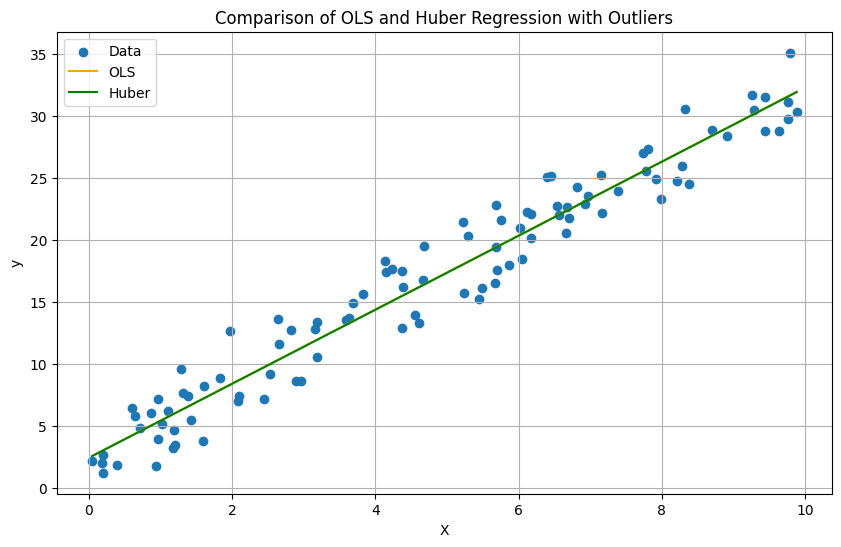

Huber Regression MSE: 3.970232110163875
Linear Regression MSE: 3.9697545948985944


In [6]:

# Display widgets and initial plot
display(X_outliers_widget, y_outliers_widget, button)
update_plot('', '')


In [7]:

# Define function to handle button click
def on_button_clicked(b):
    X_outliers = X_outliers_widget.value
    y_outliers = y_outliers_widget.value
    update_plot(X_outliers, y_outliers)

In [8]:

# Attach button click event
button.on_click(on_button_clicked)